<a href="https://colab.research.google.com/github/LukaAndric/nans/blob/main/nans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import files
upload = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error, r2_score

# Učitavanje podataka
data = pd.read_csv("hotel_bookings.csv")

# Provera nedostajućih vrednosti
print(data.isnull().sum())

# Zamena nedostajućih vrednosti srednjom vrednošću
data['lead_time'].fillna(data['lead_time'].mean(), inplace=True)

# Provera ponovo da li postoje nedostajuće vrednosti
print(data.isnull().sum())


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [24]:
data.dropna(subset = ['children', 'country', 'agent', 'company'], axis=0, inplace=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,...,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,...,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,...,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,...,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,...,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16


In [25]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/len(data)).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hotel,0,0.0
is_canceled,0,0.0
reservation_status,0,0.0
total_of_special_requests,0,0.0
required_car_parking_spaces,0,0.0
adr,0,0.0
customer_type,0,0.0
days_in_waiting_list,0,0.0
company,0,0.0
agent,0,0.0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

atributi = ['lead_time', 'total_of_special_requests', 'required_car_parking_spaces', 'adr']
X = data[atributi]
y = data['is_canceled']

# Podela podataka na skup za obuku i testiranje
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

# Kreiranje i treniranje modela
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0445825808769119


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 18207 to 18238
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    173 non-null    int64  
 1   total_of_special_requests    173 non-null    int64  
 2   required_car_parking_spaces  173 non-null    int64  
 3   adr                          173 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.8 KB


In [28]:
data_new = data[['hotel', 'is_canceled', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'reservation_status', 'reservation_status_date']]

In [29]:
data_new['hotel']=data_new['hotel'].astype('category')
data_new['is_canceled']=data_new['is_canceled'].astype('category')
data_new['arrival_date_month']=data_new['arrival_date_month'].astype('category')
data_new['meal']=data_new['meal'].astype('category')
data_new['country']=data_new['country'].astype('category')
data_new['market_segment']=data_new['market_segment'].astype('category')
data_new['distribution_channel']=data_new['distribution_channel'].astype('category')
data_new['is_repeated_guest']=data_new['is_repeated_guest'].astype('category')
data_new['reserved_room_type']=data_new['reserved_room_type'].astype('category')
data_new['assigned_room_type']=data_new['assigned_room_type'].astype('category')
data_new['booking_changes']=data_new['booking_changes'].astype('category')
data_new['deposit_type']=data_new['deposit_type'].astype('category')
data_new['agent']=data_new['agent'].astype('category')
data_new['company']=data_new['company'].astype('category')
data_new['customer_type']=data_new['customer_type'].astype('category')
data_new['reservation_status']=data_new['reservation_status'].astype('category')
data_new['reservation_status_date']=data_new['reservation_status_date'].astype('category')

<ipython-input-29-0841ae873056>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['hotel']=data_new['hotel'].astype('category')
<ipython-input-29-0841ae873056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['is_canceled']=data_new['is_canceled'].astype('category')
<ipython-input-29-0841ae873056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   hotel                    217 non-null    category
 1   is_canceled              217 non-null    category
 2   arrival_date_month       217 non-null    category
 3   meal                     217 non-null    category
 4   country                  217 non-null    category
 5   market_segment           217 non-null    category
 6   distribution_channel     217 non-null    category
 7   is_repeated_guest        217 non-null    category
 8   reserved_room_type       217 non-null    category
 9   assigned_room_type       217 non-null    category
 10  booking_changes          217 non-null    category
 11  deposit_type             217 non-null    category
 12  agent                    217 non-null    category
 13  company                  217 non-null    category
 14  cust

In [31]:
data_new = pd.get_dummies(data_new, drop_first=True)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2392 to 116451
Columns: 214 entries, hotel_Resort Hotel to reservation_status_date_2017-08-27
dtypes: uint8(214)
memory usage: 47.0 KB


In [35]:
#linearna regresija
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score:', r2_adj)
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

Mean squared error:  0.0445825808769119
Mean absolute error:  0.12637930549862447
Root mean squared error:  0.21114587582264518
R2 score:  -0.02752234021073119
R2 adjusted score: -0.05198715783479635
    y    y_pred
0   0  0.107069
1   0  0.104453
2   0  0.058432
3   0  0.110081
4   0  0.109618
5   0  0.111845
6   0 -0.072579
7   0  0.053750
8   0  0.105158
9   0  0.115511
10  0 -0.046756
11  0  0.112948
12  0 -0.024274
13  0  0.113067
14  0  0.052856
15  0  0.105679
16  0  0.105675
17  0  0.111996
18  0 -0.049769
19  1  0.111227


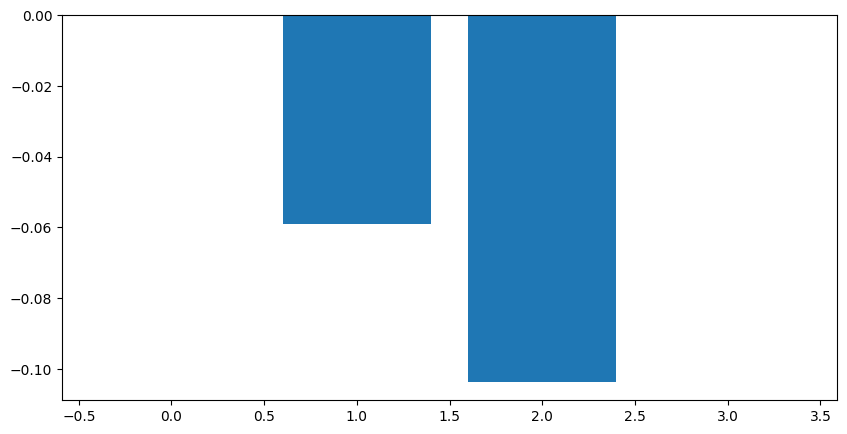

In [36]:
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(X_train, y_train)

# Testiranje
y_predicted = first_regression_model.predict(X_test)

# Evaluacija
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()

Mean squared error:  0.08104295357723812
Mean absolute error:  0.16257486711635127
Root mean squared error:  0.2846804411568138
R2 score:  -0.8678471205420593
R2 adjusted score: -1.0463038518040397
    y    y_pred
0   0  0.118257
1   0  0.171238
2   0 -0.100776
3   0  0.078496
4   0  0.172378
5   0  0.137164
6   0 -0.011632
7   0  0.025811
8   0  0.185062
9   0 -0.025886
10  0 -0.071146
11  0  0.071563
12  0 -0.263250
13  0  0.085747
14  0 -0.815841
15  0  0.127608
16  0  0.130398
17  0  0.132069
18  0 -0.701293
19  1  0.078514


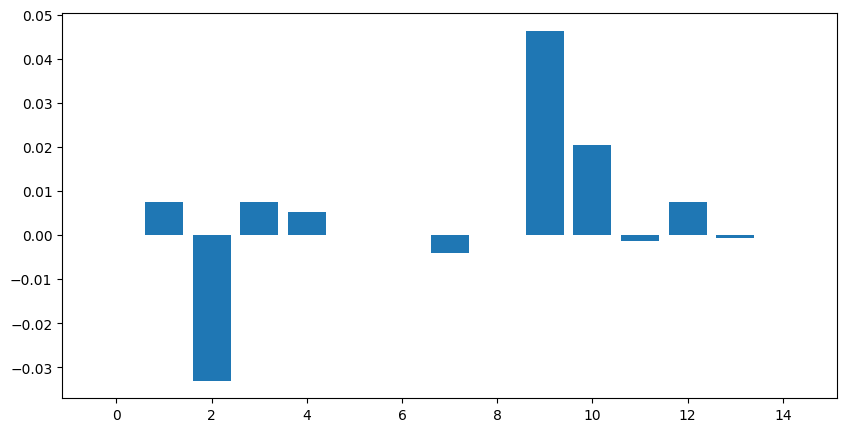

koeficijenti:  [ 0.00000000e+00  7.59650847e-03 -3.30643621e-02  7.50695818e-03
  5.17158794e-03 -1.89311204e-05 -6.11571290e-05 -4.18103704e-03
 -3.21325306e-05  4.63380096e-02  2.03755796e-02 -1.26490501e-03
  7.50695818e-03 -6.23696876e-04 -1.76725486e-05]


In [39]:
#ridge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_inter_train = poly.fit_transform(X_train)
x_inter_test = poly.fit_transform(X_test)

ridge_model = Ridge(alpha=5)

# Obuka modela
ridge_model.fit(x_inter_train, y_train)

# Testiranje
y_predicted = ridge_model.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

Mean Squared Error (Random Forest): 0.08089093282942182


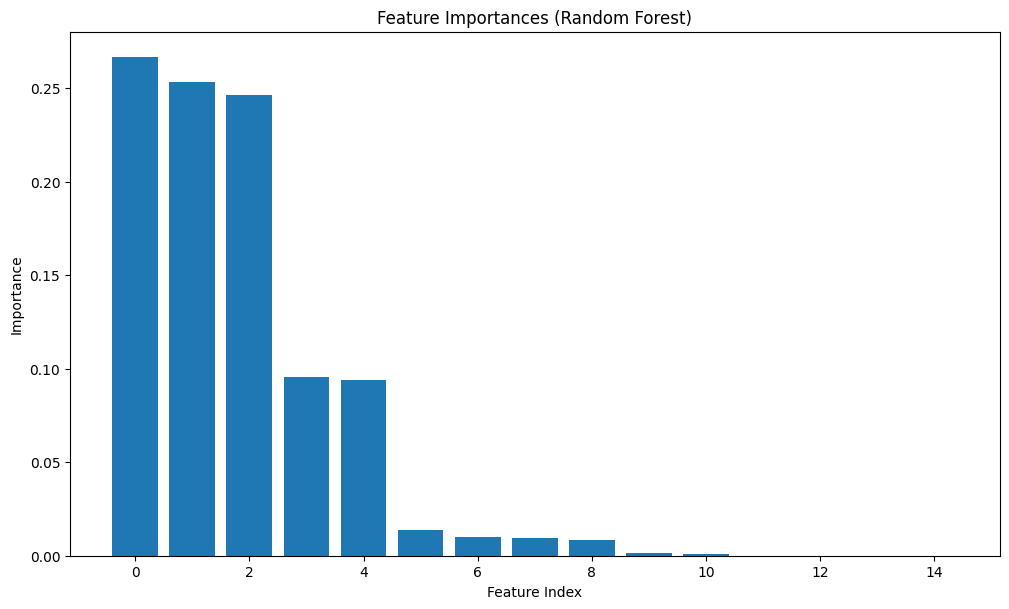

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)  # Example hyperparameters

rf_model.fit(x_inter_train, y_train)

y_pred_rf = rf_model.predict(x_inter_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

importances = rf_model.feature_importances_
feature_names = ['feature1', 'feature2', ...]

indices = np.argsort(importances)[::-1]

if feature_names is not None and len(feature_names) == x_inter_train.shape[1]:
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances (Random Forest)")
    plt.bar(range(x_inter_train.shape[1]), importances[indices], align="center")
    plt.xticks(range(x_inter_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances (Random Forest)")
    plt.bar(range(x_inter_train.shape[1]), importances[indices], align="center")
    plt.tight_layout()
    plt.xlabel("Feature Index")
    plt.ylabel("Importance")
    plt.show()

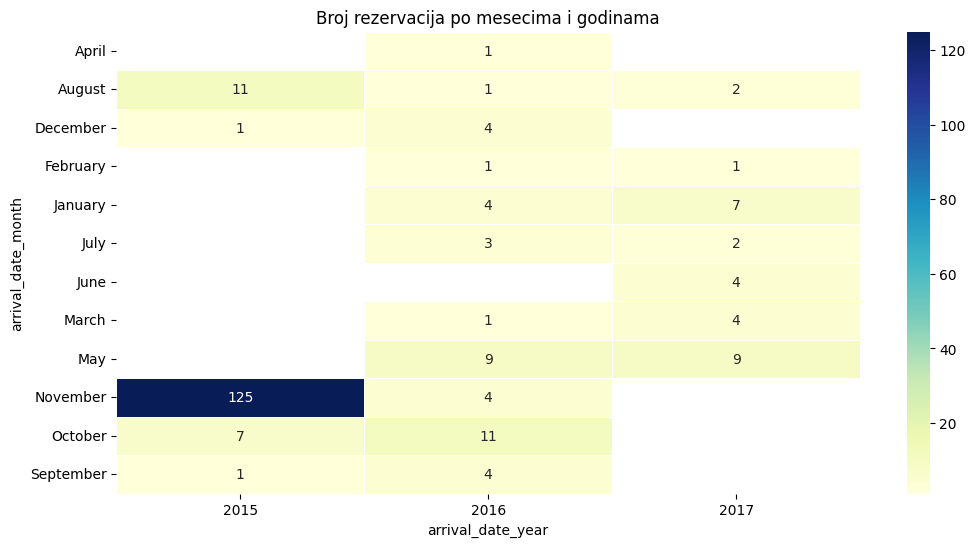

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

reservations_by_month_year = data.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')

# Kreiranje pivot tabele za bolju vizualizaciju
pivot_table = reservations_by_month_year.pivot(index='arrival_date_month', columns='arrival_date_year', values='count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Broj rezervacija po mesecima i godinama')
plt.show()

<ipython-input-46-b36e95959881>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arrival_date_month', y='total_cancelations', data=cancelations_by_month, palette='viridis')


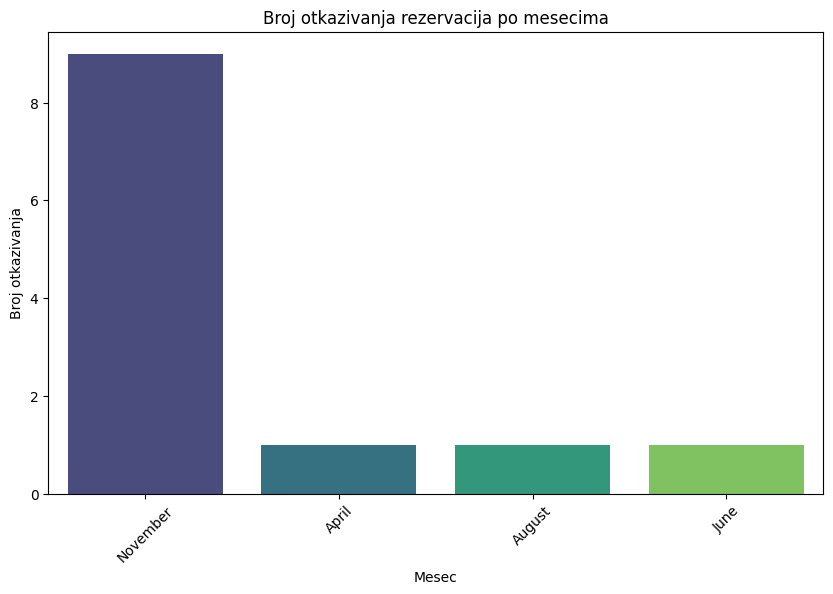

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

canceled_reservations = data[data['reservation_status'] == 'Canceled']

cancelations_by_month = canceled_reservations.groupby('arrival_date_month').size().reset_index(name='total_cancelations')

cancelations_by_month = cancelations_by_month.sort_values(by='total_cancelations', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='total_cancelations', data=cancelations_by_month, palette='viridis')
plt.title('Broj otkazivanja rezervacija po mesecima')
plt.xlabel('Mesec')
plt.ylabel('Broj otkazivanja')
plt.xticks(rotation=45)
plt.show()